# Upper Confidence Bound - Reinforcement Learning

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implemeneting UCB

In [4]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sums_of_rewards = [0]*d
total_reward=0

In [5]:
for n in range(0,N):
    ad = 0
    max_upper_bound=0
    for i in range(0,d):
      if (numbers_of_selections[i]>0):
        average_reward=sums_of_rewards[i]/numbers_of_selections[i]
        delta_i=np.sqrt(3/2*np.log(n+1)/numbers_of_selections[i])
        upper_bound=average_reward+delta_i
      else:
        upper_bound=1e400
      if upper_bound>max_upper_bound:
        max_upper_bound=upper_bound
        ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]=numbers_of_selections[ad]+1
    reward=df.values[n,ad]
    sums_of_rewards[ad]=sums_of_rewards[ad]+reward
    total_reward=total_reward+reward

## Visualising the results

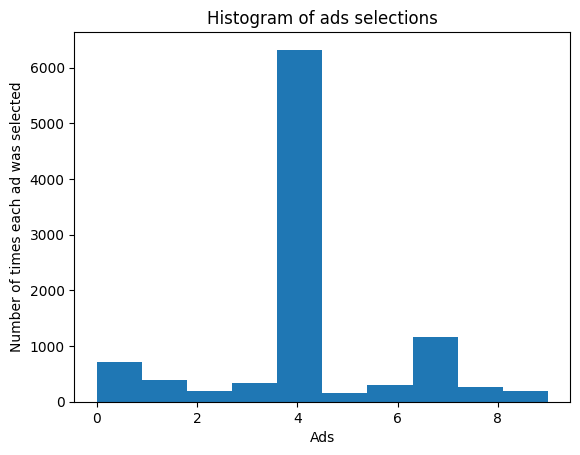

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

UCB can find it only in 1000 rounds but not in 500 rounds. Can Thompson Sampling beat this?